In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [78]:
df = pd.read_csv("/content/tested.csv")
le = LabelEncoder()
correct=0


df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df = df.dropna()

X = df.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1).values
Y = df['Survived'].values

# when test size changed to 0.7 accuracy drops from 100% to around 80%

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.7)

# EDA
discernments about column names

In [79]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,2
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.1750,E31,2
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,B36,0
28,920,0,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,A21,2


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 12 to 414
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Pclass       87 non-null     int64  
 3   Name         87 non-null     object 
 4   Sex          87 non-null     int64  
 5   Age          87 non-null     float64
 6   SibSp        87 non-null     int64  
 7   Parch        87 non-null     int64  
 8   Ticket       87 non-null     object 
 9   Fare         87 non-null     float64
 10  Cabin        87 non-null     object 
 11  Embarked     87 non-null     int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 8.8+ KB


In [83]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,1.137931,0.494253,39.247126,0.597701,0.482759,98.109198,0.908046
std,126.751901,0.502865,0.435954,0.502865,15.218730,0.637214,0.860801,88.177319,0.995714
min,904.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,0.000000,27.000000,0.000000,0.000000,35.339600,0.000000
50%,1094.000000,1.000000,1.000000,0.000000,39.000000,1.000000,0.000000,71.283300,0.000000
75%,1216.000000,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650,2.000000
max,1306.000000,1.000000,3.000000,1.000000,76.000000,3.000000,4.000000,512.329200,2.000000


In [84]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#Logistic Regression

used scikitlearn's library for the logistic regression function, and the fit method in order to train the data, afterwards making predictions through every iteration using the predict method. The actual value is then obtained from y and a comparison is made with the prediction, if they match, the variable correct is incremented.

In [85]:
reg = LogisticRegression()
reg.fit(train_x,train_y)

for i in range(len(test_x)):
    prediction = reg.predict([test_x[i]])[0]
    actual = test_y[i]
    if prediction == actual:
        correct += 1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Result with 0.7 Test Value

In [86]:
print(f"\nResults Summary:")
print(f"Test set size: {len(test_x)}")
print(f"Correct predictions: {correct}")
print(f"Accuracy: {correct/len(test_x)*100:.1f}%")


all_predictions = reg.predict(test_x)
cm = confusion_matrix(test_y, all_predictions)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"           Dead    Alive")
print(f"Actual Dead  {cm[0,0]:2d}      {cm[0,1]:2d}")
print(f"      Alive  {cm[1,0]:2d}      {cm[1,1]:2d}")


Results Summary:
Test set size: 61
Correct predictions: 59
Accuracy: 96.7%

Confusion Matrix:
                 Predicted
           Dead    Alive
Actual Dead  30       2
      Alive   0      29


#Result with 0.2 Test value

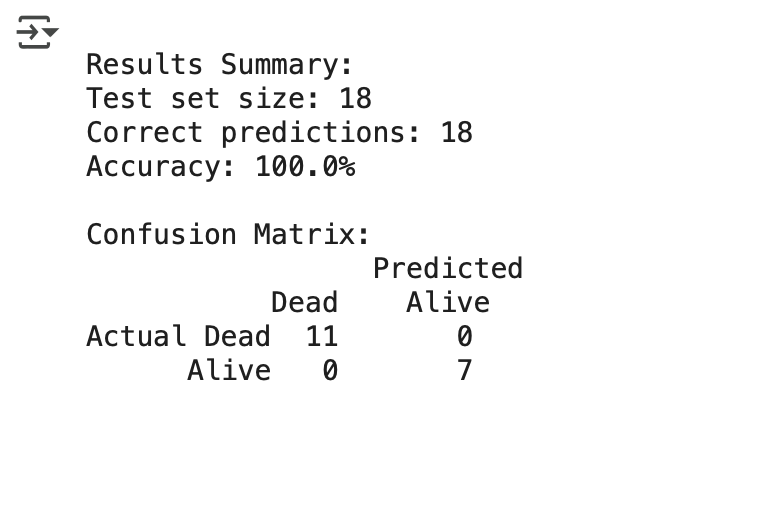